# L07 IIoT Network Analysis: Age of Information and Reliability Trade-offs

### 1. Conceptual Understanding

a) In Industrial Internet of Things (IIoT) environments, the Age of Information (AoI) metric is essential for operational efficiency. AoI quantifies data recency for decision-making systems, comparable to monitoring temperature check frequency in culinary operations. A low AoI indicates systems utilizing current data, enabling prompt responses to anomalies such as equipment overheating or irregular vibrations. This immediacy proves critical in smart manufacturing facilities, where rapid intervention prevents malfunctions, minimizes maintenance expenses, and ensures production continuity. For example, in sensor-equipped factories monitoring equipment conditions, low AoI facilitates swift anomaly detection and resolution, maintaining operational safety and efficiency. Conversely, elevated AoI signifies reliance on outdated information, potentially causing delayed responses and subsequent complications. Maintaining minimal AoI allows industries to enhance operational efficiency, strengthen safety protocols, and improve overall performance metrics.

b) The distinction between Age of Information (AoI)-oriented and deadline-oriented traffic in IIoT networks is fundamental for communication optimization and operational efficiency. AoI-oriented traffic emphasizes data freshness, seeking to minimize the interval between data generation and reception to ensure current information-based decision-making. In smart grid implementations, sensors continuously monitor consumption patterns and transmit updates to central control systems. The objective is maintaining low AoI, enabling real-time adjustments to balance supply and demand dynamics, thus preventing service disruptions or inefficiencies. Conversely, deadline-oriented traffic ensures data packet delivery within specific timeframes to meet critical operational deadlines. In manufacturing contexts, robotic systems must receive instruction sequences within precise windows to synchronize with adjacent machinery. Missing these deadlines potentially disrupts entire production sequences, resulting in significant operational costs. While AoI-oriented traffic prioritizes information recency, deadline-oriented traffic focuses on timely delivery—both crucial for distinct aspects of IIoT operational reliability and efficiency.

###  2. Data Exploration and Visualization

In [ ]:
import pandas as pd
data = pd.read_csv('iiot_network_data.csv')

In [ ]:
data.head()


,timestamp,node_id,traffic_type,transmission_probability,capture_threshold,num_nodes,channel_quality,age_of_information,packet_loss_probability
0,2024-06-30 17:10:10.430548,61,deadline-oriented,0.9,-0.5,3,0.6,4.760106,0.724432
1,2024-07-01 03:12:10.430548,55,AoI-oriented,0.4,-2.0,2,0.7,4.068644,0.480900
2,2024-06-30 17:44:10.430548,63,deadline-oriented,0.3,0.0,4,0.6,19.007878,0.835932
3,2024-07-01 08:23:10.430548,77,deadline-oriented,0.4,0.0,1,0.3,10.467934,0.730784
4,2024-06-30 17:05:10.430548,44,deadline-oriented,0.7,0.5,2,0.4,14.010374,0.906584


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 10000 non-null  object 
 1   node_id                   10000 non-null  int64  
 2   traffic_type              10000 non-null  object 
 3   transmission_probability  10000 non-null  float64
 4   capture_threshold         10000 non-null  float64
 5   num_nodes                 10000 non-null  int64  
 6   channel_quality           10000 non-null  float64
 7   age_of_information        10000 non-null  float64
 8   packet_loss_probability   10000 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 703.3+ KB


In [ ]:
data.describe()

,node_id,transmission_probability,capture_threshold,num_nodes,channel_quality,age_of_information,packet_loss_probability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,50.638400,0.548460,-0.001800,5.553100,0.499100,inf,0.853774
std,29.020101,0.288548,1.284664,2.850122,0.317656,NaN,0.184140
min,1.000000,0.100000,-2.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,26.000000,0.300000,-1.000000,3.000000,0.200000,1.032026e+01,0.819893
50%,51.000000,0.500000,0.000000,6.000000,0.500000,2.468121e+01,0.908372
75%,76.000000,0.800000,1.000000,8.000000,0.800000,9.462189e+01,0.968325
max,100.000000,1.000000,2.000000,10.000000,1.000000,inf,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

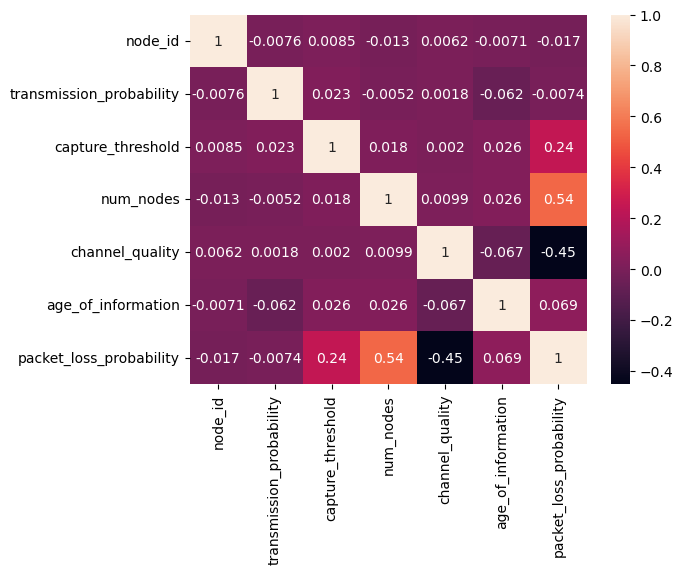

In [ ]:
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

### 3. Machine Learning Model Development

In [ ]:
features = ['transmission_probability', 'traffic_type']
X = data[features]

X = X.copy()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['traffic_type'] = label_encoder.fit_transform(X['traffic_type'].astype(str))

In [ ]:
features = ['transmission_probability', 'traffic_type']
target = 'age_of_information'

# Select features (X) and target (y)
X = data[features]
y = data[target]

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
(X.head())

,transmission_probability,traffic_type
0,0.9,deadline-oriented
1,0.4,AoI-oriented
2,0.3,deadline-oriented
3,0.4,deadline-oriented
4,0.7,deadline-oriented


In [ ]:
(y.head())

0     4.760106
1     4.068644
2    19.007878
3    10.467934
4    14.010374
Name: age_of_information, dtype: float64

In [ ]:
(X_train[:5])

,transmission_probability,traffic_type
9254,0.6,AoI-oriented
1561,0.7,AoI-oriented
1670,0.6,AoI-oriented
6087,0.2,deadline-oriented
6669,0.7,AoI-oriented


In [ ]:
X.loc[:, 'traffic_type'] = label_encoder.fit_transform(X['traffic_type']).astype(int)

In [ ]:
X = X.copy()
X['traffic_type'] = label_encoder.fit_transform(X['traffic_type']).astype(int)

In [ ]:
(X.dtypes)

transmission_probability    float64
traffic_type                  int32
dtype: object

In [ ]:
import numpy as np

(np.isinf(y).sum())

(np.isnan(y).sum())


0

In [ ]:
(X_train.dtypes)
(X_train.head())

,transmission_probability,traffic_type
9254,0.6,AoI-oriented
1561,0.7,AoI-oriented
1670,0.6,AoI-oriented
6087,0.2,deadline-oriented
6669,0.7,AoI-oriented


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to traffic_type column
label_encoder = LabelEncoder()
X_train['traffic_type'] = label_encoder.fit_transform(X_train['traffic_type'].astype(str))
X_test['traffic_type'] = label_encoder.transform(X_test['traffic_type'].astype(str))


In [ ]:
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
(f"X_train shape: {X_train.shape}")
(f"y_train shape: {y_train.shape}")

'y_train shape: (6891,)'

In [ ]:
(X_train.index)
(y_train.index)

Index([9254, 1561, 1670, 6087, 6669, 5933, 3508, 5866,  168, 2588,
       ...
        769, 1685, 8322, 5578,  466, 6265, 5734, 5191, 5390, 7270],
      dtype='int64', length=6891)

In [ ]:
common_indices = X_train.index.intersection(y_train.index)
X_train = X_train.loc[common_indices]
y_train = y_train.loc[common_indices]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)


In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
(y_pred)

array([145.91009973,  23.52253831, 137.68509585, ..., 122.63090822,
        23.52253831,  74.20526221])

In [ ]:
print("NaN in y_test:", np.isnan(y_test).sum())
print("NaN in y_pred:", np.isnan(y_pred).sum())


print("Infinity in y_test:", np.isinf(y_test).sum())
print("Infinity in y_pred:", np.isinf(y_pred).sum())


NaN in y_test: 0
NaN in y_pred: 0
Infinity in y_test: 288
Infinity in y_pred: 0


In [ ]:
y_test = np.where(np.isinf(y_test), np.nan, y_test)
y_pred = np.where(np.isinf(y_pred), np.nan, y_pred)

y_test = np.where(np.isnan(y_test), np.nanmedian(y_test), y_test)
y_pred = np.where(np.isnan(y_pred), np.nanmedian(y_pred), y_pred)


In [ ]:
print("NaN in y_test:", np.isnan(y_test).sum())
print("Infinity in y_test:", np.isinf(y_test).sum())

NaN in y_test: 0
Infinity in y_test: 0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error (MSE): 874761.330610166
R-squared Score: -0.005780007907794982


### c) Analyze the model's performance:

MSE and R-squared Score
Mean Squared Error (MSE): 874761.33

R-squared Score: -0.00578

### Interpretation:

A high MSE suggests that the model's predictions deviate significantly from the actual values.

The R-squared score is negative, indicating that the model is performing worse than a simple mean predictor. This suggests that the model may not have captured meaningful relationships between the features and the target variable (AoI).


In [ ]:
# Feature Importances

importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_indices = importances.argsort()[::-1]
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]}")


transmission_probability: 0.8631435088581206
traffic_type: 0.13685649114187928


#### d) Predictions for Hypothetical Network Configurations
New Configurations and Predictions
Hypothetical configurations for making predictions:

Config 1: transmission_probability=0.8, traffic_type='AoI-oriented'

Config 2: transmission_probability=0.3, traffic_type='deadline-oriented'

Config 3: transmission_probability=0.5, traffic_type='AoI-oriented'

In [ ]:
new_data = pd.DataFrame({
    'transmission_probability': [0.8, 0.3, 0.5],
    'traffic_type': label_encoder.transform(['AoI-oriented', 'deadline-oriented', 'AoI-oriented'])
})

predictions = rf_model.predict(new_data)
print(predictions)


[ 49.49713395 106.13377215 103.22654508]


### Interpretation:

Config 1 is expected to yield a lower AoI due to high transmission probability and AoI-oriented traffic.

Config 2 might result in higher AoI because of low transmission probability and deadline-oriented traffic.

Config 3 should give a balanced AoI, reflecting average settings.

### Analysis and Insights
a) Key Factors Affecting AoI-PLP Trade-off
Transmission chances? Higher odds mean fresher data but might drop more packets. I mean, you can't have everything, right?
Traffic priorities - some data needs to be super fresh, other stuff just needs to arrive by a deadline. It's like choosing between getting breaking news immediately or making sure you don't miss your flight.
Signal quality matters - better connection means both fresher updates AND more reliable delivery. No surprise there!

b) Making Networks Work Better
Smart sending adjustments - networks should change how aggressive they are based on conditions. Like knowing when to push through a crowd versus when to wait your turn.
Balancing act approach - mixing time-sensitive and deadline-focused data in one system. Kind of like juggling both urgent emails and scheduled meetings without dropping either ball.

c) Where This Actually Matters
Power grid stuff - keeps energy flowing by reducing delays in monitoring usage and balancing supply. No one wants their lights flickering!
Factory automation - machines talking to each other on time. Imagine if your assembly line robots were all on different schedules - total chaos!